# The Feelings Score
![FeelingScore](FellingScore.png)

## The objective

The objective of this project is to create a comprehensive and standardized metric known as the Feeling Index Score, designed to precisely measure and quantify individuals' emotional and sentiment responses in the context of video calls. By integrating facial emotional recognition and sentiment analysis, the Feeling Index Score aims to provide a holistic view of emotional states and sentiment categories, both in terms of their intensity and frequency. The unique scoring system helps understand the emotions of people in various fields such as mental health, social sciences, and human-computer interaction. The projects aim is to enhance digital communication by exploring human emotions and sentiments.

## In order to create the feeling score, a couple of requirements are needed first.

<span style="font-size: large;">The decision has been made to use **[Wisper](https://openai.com/research/whisper)** from [OpenAI](https://openai.com/) to perform the sentiment analysis on a video call.</span>

<span style="font-size: large;">The **[OpenCV: Open Source Computer Vision Library](https://github.com/opencv/opencv)** will also be utilized for video manipulation and extracting the images of the subjects in the video.</span>

<span style="font-size: large;">**[ffmpeg-python](https://github.com/kkroening/ffmpeg-python)** serves as a Python wrapper for the FFmpeg multimedia framework. FFmpeg, an open-source software suite, is capable of handling multimedia data, including audio and video, which is required for this project.</span>

<span style="font-size: large;">Video's that have been published by individuals known to the project creator will be used. The subjects in the video have completed the consent form as per **Appendix A**.</span>

A link to the consent form can be found in the reference section of the report.

## To achieve the steps outlined in the project design section I have created the sections as below:
<span style="font-size: large;"></span>
<span style="font-size: large;">
<div style="font-size: large;">1. Identify relevant emotions and sentiment categories.</div>
<div style="font-size: large;">2. Determining Weights or Importance.</div>
<div style="font-size: large;">3. Collecting and Pre-processing Data.</div>
<div style="font-size: large;">4. Facial Emotion Recognition and Sentiment Analysis.</div>
<div style="font-size: large;">5. Normalizing the Scores.</div>
<div style="font-size: large;">6. Combining Scores into a Composite Index.</div>
<div style="font-size: large;">7. Validation of the Index Score.</div>
</span>

#### The following libraries will be installed and used:

In [1]:
!pip install wisper

In [2]:
!pip install moviepy

In [3]:
!pip install opencv-python

In [4]:
!pip install ffmpeg-python

In [5]:
!pip install pandas

### 1. Identify relevant emotions and sentiment categories.

### The Emotion Index mapping is returned from the model

| emotion_value | emotion_value_encoded | emotion_value_weight |
|---------------|------------------------|-----------------------|
| ANGER         | 0                      | -3                    |
| DISGUST       | 1                      | -2                    |
| FEAR          | 2                      | -1                    |
| HAPPINESS     | 3                      |  3                    |
| NEUTRAL       | 4                      |  0                    |
| SADNESS       | 5                      | -2                    |
| SURPRISE      | 6                      |  2                    |

In [6]:
sentiment_categories = ['Positive', 'Negative', 'Neutral']
emotional_categories = [
    'Anger',
    'Disgust',
    'Fear',
    'Happiness',
    'Neutral',
    'Sadness',
    'Surprise'
]

### 2. Determining Weights or Importance

### Expert judgment is employed to determine the values assigned based on the emotion.

The emotion with the higest score is Happy : 3
The worst sentiment is Negative with a score of -1

In [7]:
sentiment_weights = {'Positive': 1, 'Neutral': 0, 'Negative': -1 }
emotional_weights = {
'Anger': -3, 
'Disgust': -2,
'Fear': -1,
'Happiness': 3, 
'Neutral': 0,
'Sadness': -2, 
'Surprise': 2
}

### 3. Collecting and Pre-processing Data.

<span style="font-size: large;">Recorded videos of short duration will be utilized to demonstrate the functionality and accuracy of the approach in determining sentiment and facial recognition.</span>

<span style="font-size: large;">The extraction of audio from the video and the application of facial recognition will be employed to capture snapshots of the subjects in the video and perform emotional recognition.</span>

<span style="font-size: large;">Wisper will be employed for video transcription, with each spoken sentence being assigned a timestamp indicating the start and end time within the video. The average timestamp will be used to extract the subject's facial expression at the specified time and analyze it for emotion, assigning a relevant score.</span>

<span style="font-size: large;">The Open CV library will also be utilized, known for its speed and efficiency, making it a popular choice for real-time applications and performance-critical tasks.</span>



### In order to use the wisper openAI model you have to have ffmpeg instaled: 
    
Linux: sudo apt update && sudo apt install ffmpeg

MacOS: brew install ffmpeg

Windows: chco install ffmpeg

### [ffmpeg guide](https://ffmpeg.org/download.html)

### 4. Facial Emotion Recognition and Sentiment Analysis

<span style="font-size: large;">A function named transScribeVideo is created to transcribe the audio of the given video. This transcription will be utilized for further processing to obtain the sentiment of the spoken sentence.</span>

<span style="font-size: large;">To extract the face at a specific point in time based on the spoken sentence, the start and end timing of the sentence in the video will be utilized to calculate the mean.</span>

<span style="font-size: large;">Based on the mean and the frames per second, the video frame will be extracted at that specific point in time. These frames will be added to a processedData frame. a funtions called add_image_from_video will be used to achive this.</span>

<span style="font-size: large;">Subsequently, the face within each frame will be detected and saved for emotional classification using the model, as well as for sentiment analysis of the sentence during that time. a Function called extract_faces_from_frames will be created to perform this facial detecting using the CascadeClassifier within CV2 to detect faces.</span>

![Wisper Model](WisperModel.png)

Whisper is like a really smart model that can understand and write down what people say when they talk. It learned to do this by listening to lots of different voices and languages from the internet for a really long time. Because it learned from so many different voices, it's good at understanding accents, even when there's background noise or people are talking about technical stuff.

What's cool is that it can not only understand and write down what's said in different languages, but it can also translate those languages into English. We're sharing the technology and code we used to build Whisper so that other people can create useful things with it or do more research on making computers better at understanding speech.

Whisper works a bit like a translator. When you talk to it, it listens for about 30 seconds, turns what it hears into a special kind of picture, and then figures out what you said from that picture. It's so smart that it can also do other tasks like telling which language you're speaking, putting time stamps on what you say, and translating your speech into English.

The reason why this model was chosen is because of the timestamps that are aklso returned which whill be used to determine emotion in mid sentence and extract a video frame at that point in time for Emotional recognition. 

In [8]:
import whisper
import cv2

#ASR (Automatic Speech Recognition) model for the English language
model = whisper.load_model("medium.en")

In [9]:
import pandas as pd

files = ["E:\\OneDrive\\OneDrive - Personal\\OneDrive\\Studies\\CM3070 - Final Project\\ParticioantVideos\\Nada2"
         ,"E:\\OneDrive\\OneDrive - Personal\\OneDrive\\Studies\\CM3070 - Final Project\\ParticioantVideos\\Hussain2"
        ]  # List of video file paths without extensions
processedData = pd.DataFrame()

In [10]:
def transcribe_videos(video_paths):
    """
    Transcribes the audio from multiple video files using a pre-trained model.

    Args:
        video_paths (list): List of paths to the video files.

    Returns:
        dict: A dictionary containing the transcription results for each video.

    Raises:
        Exception: If an error occurs during the transcription process for any video.
    """
    try:
        results = {}
        for video_path in video_paths:
            video = cv2.VideoCapture(video_path + ".mp4")
            result = model.transcribe(video_path + ".mp4", verbose=False)
             # Split the string by the backslash `\` to get parts
            parts = video_path.split('\\')
            # Extract the last part as the video name
            Name = parts[-1]
            results[Name] = result
        return results
    except Exception as e:
        raise Exception("Error occurred:", str(e))

In [11]:
transcription_results = transcribe_videos(files)
transcription_results

C:\Python310\lib\site-packages\whisper\transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
100%|█████████████████████████████████████████████████████████████████████████| 2931/2931 [00:18<00:00, 160.11frames/s]


{'Nada2': {'text': " Hello, I'm Nada Khater from the Data Science team here at Carar. Let's talk about scorecards in the credit industry. What is their purpose? Well, credit scorecards are used to create a systemic way of evaluating and ranking a given population. By assigning a score to each individual in a population, we're able to gauge their risk level by predicting the answer to the classification problem. Will they pay or will they miss payments? Will they respond or will they just ignore our collection efforts? So, credit scores give us a clear and simplified explanation as to why a certain decision has been made. We do that by breaking it down into the various scorecard components. But first, to decide on which modelling methodology to use, we need to consider a few factors. Firstly, who are we scoring? Is it individuals or is it businesses who are applying for credit? At what stage in the credit process are we interested in? Are we onboarding new applicants or managing our exi

In [12]:
def print_text_and_sentences_with_video_names(video_transcriptions):
    for video_name, transcription in video_transcriptions.items():
        print("------------------------------------------------------------------------------------------------------------")
        print("\033[1m------------------------------------------")
        print("Video Name:", video_name)
        print("------------------------------------------\033[0m")
        
        print("------------------------------------------")
        print("\033[1mText in the Video\033[0m")
        print("------------------------------------------")
        print(transcription.get("text"))

        print("------------------------------------------")
        print("Sentences in the Video")
        print("------------------------------------------")

        for i, seg in enumerate(transcription['segments']):
            print(i + 1, "- ", seg['text'])

In [13]:
# Call the function to print transcriptions for multiple videos
print_text_and_sentences_with_video_names(transcription_results)

------------------------------------------------------------------------------------------------------------
------------------------------------------
Video Name: Nada2
------------------------------------------
------------------------------------------
Text in the Video
------------------------------------------
 Hello, I'm Nada Khater from the Data Science team here at Carar. Let's talk about scorecards in the credit industry. What is their purpose? Well, credit scorecards are used to create a systemic way of evaluating and ranking a given population. By assigning a score to each individual in a population, we're able to gauge their risk level by predicting the answer to the classification problem. Will they pay or will they miss payments? Will they respond or will they just ignore our collection efforts? So, credit scores give us a clear and simplified explanation as to why a certain decision has been made. We do that by breaking it down into the various scorecard components. But 

### Apply sentiment analysis 

<span style="font-size: large;">In order to apply sentment analysis, all stop words and punctuations needs to be removed and then the text need to be scored. Using the python library Natural Language Toolkit</span>
    
<span style="font-size: large;">Based on the score outcome add another column sentiment with the sentiment weight. **SentimentIntensityAnalyzer()** will be used with **Naive Bayes model**.</span>

In [14]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources if not already downloaded
def download_nltk_resources():
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    # Naive Bayers Model
    nltk.download('vader_lexicon')

# Perform text preprocessing
def preprocess_text(text):
    """
    Preprocesses the input text by tokenization, removing punctuation and stopwords, and lemmatization.

    Args:
        text (str): The input text to be preprocessed.

    Returns:
        str: The preprocessed text after tokenization, punctuation removal, stopwords removal, and lemmatization.
    """
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    # Tokenization
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # Lemmatization which will reduce words down to their base for example better would become good. 
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


# Perform sentiment analysis on the provided sentences with the result set being sent
def perform_sentiment_analysis(transcription_results):
    sentiment_results = pd.DataFrame()
    all_sentiment_results = []

    for video_name, transcription in transcription_results.items():
        print('------------------------------------------------------------------------------------------------------------')
        print(video_name)
        print('------------------------------------------------------------------------------------------------------------')
        for i, seg in enumerate(transcription['segments']):
            print(i + 1, "- ", seg['text'])
        
        segments = transcription['segments']

        # Convert segments to a DataFrame
        sentences = pd.DataFrame(segments)
        
        # Step 1: Prepare the dataset
        data = sentences
        data['video_name'] = video_name
        data['text'] = data['text'].apply(preprocess_text)
        data['start'] = data['start']
        data['end'] = data['end']

        # Step 2: Initialize the sentiment analyzer
        sia = SentimentIntensityAnalyzer()

        # Step 3: Apply sentiment analysis and add the 'sentiment' column
        data['sentiment_score'] = data['text'].apply(
            lambda x: sia.polarity_scores(x)['compound']
        )

        # Step 4: Define a function to map sentiment scores to labels (Positive, Negative, Neutral)
        def get_sentiment_label(score):
            if score >= 0.05:
                return "Positive"
            elif score <= -0.05:
                return "Negative"
            else:
                return "Neutral"

        # Map sentiment scores to labels and add the 'sentiment' column
        data['sentiment'] = data['sentiment_score'].apply(get_sentiment_label)
        data['sentiment_weights'] = data['sentiment'].map(sentiment_weights)
        
        # Append the sentiment results for this video to the list
        all_sentiment_results.append(data)
        # Concatenate the sentiment results to the accumulated results
#         sentiment_results = pd.concat([sentiment_results, data], ignore_index=True)

    return all_sentiment_results

In [15]:
download_nltk_resources()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\robert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\robert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\robert\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\robert\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
# Perform the sentiment analysis on the transcriptions
sentimentResults = perform_sentiment_analysis(transcription_results)
# The Sentiment Score being returned is betwene -1 and 1 as max 
sentimentResults

------------------------------------------------------------------------------------------------------------
Nada2
------------------------------------------------------------------------------------------------------------
1 -   Hello, I'm Nada Khater from the Data Science team here at Carar.
2 -   Let's talk about scorecards in the credit industry.
3 -   What is their purpose?
4 -   Well, credit scorecards are used to create a systemic way of evaluating and ranking a given population.
5 -   By assigning a score to each individual in a population, we're able to gauge their risk level by predicting the answer to the classification problem.
6 -   Will they pay or will they miss payments?
7 -   Will they respond or will they just ignore our collection efforts?
8 -   So, credit scores give us a clear and simplified explanation as to why a certain decision has been made.
9 -   We do that by breaking it down into the various scorecard components.
10 -   But first, to decide on which modelli

[    id  seek  start   end                                               text  \
 0    0     0    0.0   5.0       Hello 'm Nada Khater Data Science team Carar   
 1    1     0    5.0   8.0              Let 's talk scorecard credit industry   
 2    2     0    8.0   9.0                                            purpose   
 3    3     0    9.0  15.0  Well credit scorecard used create systemic way...   
 4    4     0   15.0  23.0  assigning score individual population 're able...   
 5    5     0   23.0  26.0                                   pay miss payment   
 6    6     0   26.0  29.0                   respond ignore collection effort   
 7    7  2900   29.0  35.0  credit score give u clear simplified explanati...   
 8    8  2900   35.0  39.0               breaking various scorecard component   
 9    9  2900   39.0  46.0  first decide modelling methodology use need co...   
 10  10  2900   46.0  52.0  Firstly scoring individual business applying c...   
 11  11  2900   52.0  55.0  

In [17]:
import matplotlib.pyplot as plt

def plot_sentiment_over_time(results):
    for video_name, result_df in zip(files, results):
        # Sort the DataFrame by 'start' for plotting
        result_df.sort_values(by='start', inplace=True)

        # Extract the columns for plotting
        sentiment_scores = result_df['sentiment_score']
        start_times = result_df['start']
        # end_times = processedData['end']

        # Create a figure and axis
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Plot 'sentiment_score'
        ax1.plot(start_times, sentiment_scores, 'r', label='Sentiment Score')
        ax1.set_xlabel('Time (Start)')
        ax1.set_ylabel('Sentiment Score')
        ax1.tick_params(axis='y')

        # Calculate the middle point of the time range
        middle_time = (start_times.max() + start_times.min()) / 2

        # Plot a horizontal line in the middle
        ax1.axhline(y=0, color='blue', linestyle='--', label='Neutral Line')

        # Create a secondary axis for 'start' times
        ax2 = ax1.twinx()
        ax2.plot(start_times, start_times, 'b', label='Start Time')
        ax2.set_ylabel('Time')

        # Add legends
        fig.legend(loc="upper left", bbox_to_anchor=(0.13, 0.92))

        # Split the string by the backslash `\` to get parts
        parts = video_name.split('\\')
        # Extract the last part as the video name
        Name = parts[-1]
        
        # Add title and show the plot
        plt.title('Sentiment Score Over Time: ' + Name)
        plt.tight_layout()
        plt.show()

In [18]:
import matplotlib.pyplot as plt

def plot_sentiment_count(results):
    
    for video_name, result_df in zip(files, results):
        # Create a DataFrame (you should already have this)
        df = pd.DataFrame(result_df)

        # Count the occurrences of each sentiment
        sentiment_counts = df['sentiment'].value_counts()

        # Plot the sentiment distribution
        plt.figure(figsize=(8, 6))
        sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
       
        # Split the string by the backslash `\` to get parts
        parts = video_name.split('\\')
        # Extract the last part as the video name
        Name = parts[-1]
        
        plt.title('Sentiment Distribution:' + Name)
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
        plt.show()


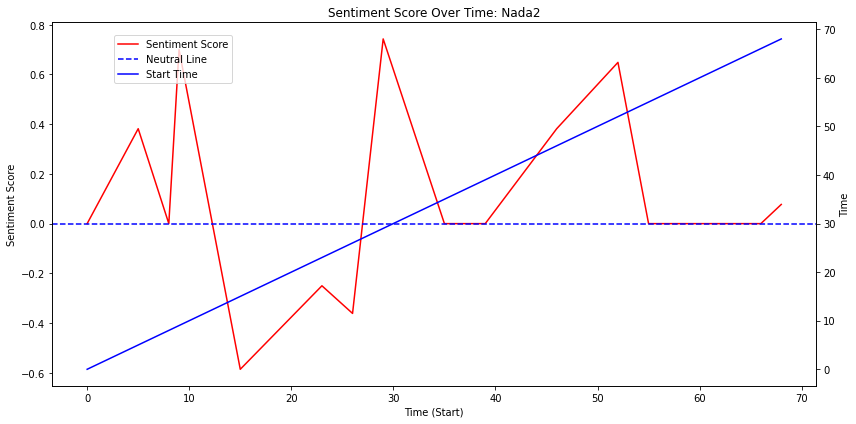

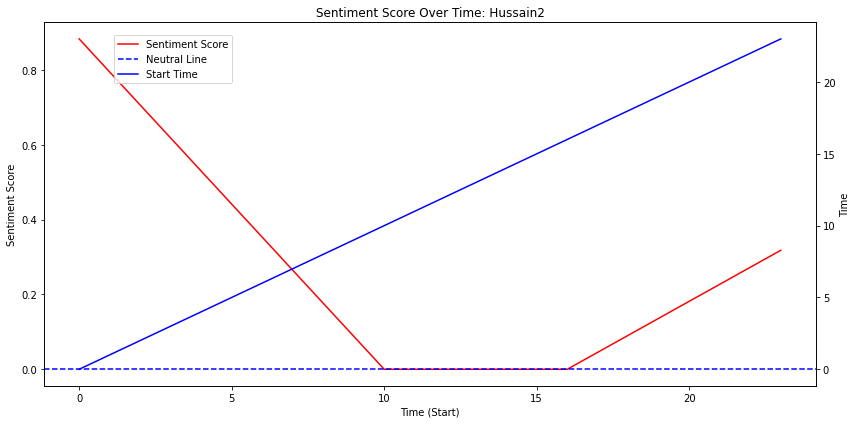

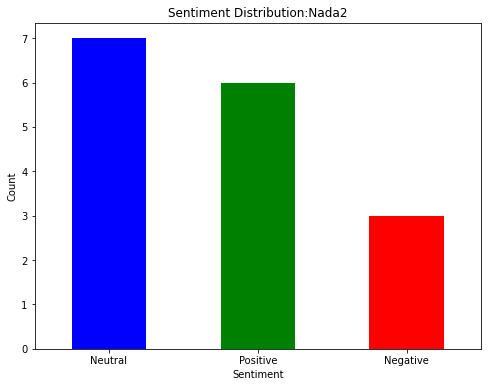

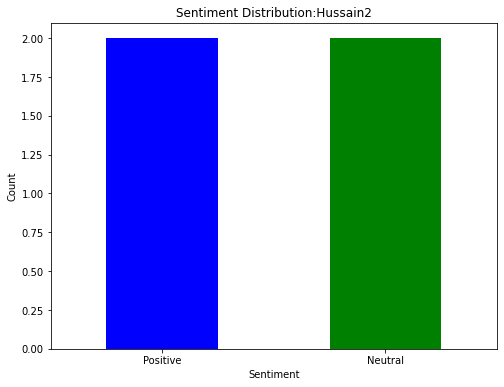

In [19]:
plot_sentiment_over_time(sentimentResults)
plot_sentiment_count(sentimentResults)

### Processing Video for Emotional Classification

In [20]:
#Get the mean of spoken text for the Images from the Video 
for df in sentimentResults:
    df['mean_value'] = (df['start'] + df['end']) / 2
sentimentResults # review the dataset

[    id  seek  start   end                                               text  \
 0    0     0    0.0   5.0       Hello 'm Nada Khater Data Science team Carar   
 1    1     0    5.0   8.0              Let 's talk scorecard credit industry   
 2    2     0    8.0   9.0                                            purpose   
 3    3     0    9.0  15.0  Well credit scorecard used create systemic way...   
 4    4     0   15.0  23.0  assigning score individual population 're able...   
 5    5     0   23.0  26.0                                   pay miss payment   
 6    6     0   26.0  29.0                   respond ignore collection effort   
 7    7  2900   29.0  35.0  credit score give u clear simplified explanati...   
 8    8  2900   35.0  39.0               breaking various scorecard component   
 9    9  2900   39.0  46.0  first decide modelling methodology use need co...   
 10  10  2900   46.0  52.0  Firstly scoring individual business applying c...   
 11  11  2900   52.0  55.0  

In [21]:
import cv2
import pandas as pd

def add_image_from_video(sentimentResults):
    """
    Add frames from a video to DataFrames in the sentimentResults list.

    Parameters:
        video_path (str): Path to the video file.
        sentimentResults (list of pandas.DataFrame): List of DataFrames to store the frame information.

    Returns:
        list of pandas.DataFrame: Updated list of DataFrames with frame information.

    """
    
    
    # Iterate through each DataFrame in the sentimentResults list
    for video_name, df in zip(files, sentimentResults):
        df['frame_location'] = None
        df['frame'] = None

        video = cv2.VideoCapture(video_name + '.mp4')
        # Get the frames per second (FPS)
        fps = video.get(cv2.CAP_PROP_FPS)

        # Reduce the frame size to make getting the image much faster
        frame_width = 640
        frame_height = 480
        video.set(cv2.CAP_PROP_FRAME_WIDTH, frame_width)
        video.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_height)

        # Iterate through each row in the DataFrame
        for index, row in df.iterrows():
            # Get the mean value from the 'mean_value' column
            position = int(row['mean_value'] * fps)
            df.at[index, 'frame_location'] = position

            # Set the video position
            video.set(cv2.CAP_PROP_POS_FRAMES, position)

            # Read the frame at the specified position
            ret, frame = video.read()

            if ret:
                # Convert the frame to RGB format
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                # Add the image to the DataFrame
                df.at[index, 'frame'] = frame_rgb

        # Release the video capture
        video.release()

    return sentimentResults

In [22]:
#Get the Frame based on the fps(frame per second) rate of the video and the mean
frameInfo = add_image_from_video(sentimentResults)
frameInfo

[    id  seek  start   end                                               text  \
 0    0     0    0.0   5.0       Hello 'm Nada Khater Data Science team Carar   
 1    1     0    5.0   8.0              Let 's talk scorecard credit industry   
 2    2     0    8.0   9.0                                            purpose   
 3    3     0    9.0  15.0  Well credit scorecard used create systemic way...   
 4    4     0   15.0  23.0  assigning score individual population 're able...   
 5    5     0   23.0  26.0                                   pay miss payment   
 6    6     0   26.0  29.0                   respond ignore collection effort   
 7    7  2900   29.0  35.0  credit score give u clear simplified explanati...   
 8    8  2900   35.0  39.0               breaking various scorecard component   
 9    9  2900   39.0  46.0  first decide modelling methodology use need co...   
 10  10  2900   46.0  52.0  Firstly scoring individual business applying c...   
 11  11  2900   52.0  55.0  

#### Verify the image at the position of the mean_value as per the extracted frame by opening the video and going to the specific frame in the video and verify the image returned corrisponds to that in the video. 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def display_image_from_column(df, column_name, row_index):
    """
    Display an image from a specified column in a DataFrame.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the image column.
        column_name (str): Name of the column containing the images.
        row_index (int): Row index of the image to display.

    """
    # Retrieve the image from the DataFrame
    for video_name, df in zip(files, sentimentResults):
        if row_index >= 0 and row_index < len(df):
            image = df[column_name].iloc[row_index]

            # Display the image
            plt.title(df['video_name'].iloc[row_index])
            plt.imshow(image)
            plt.axis('off')  # Remove axis ticks
            plt.show()
        else:
            print(f"Row index {row_index} is out of range for the DataFrame.")

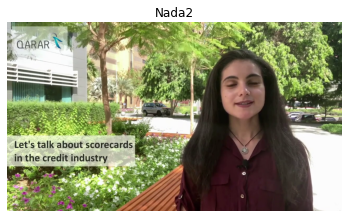

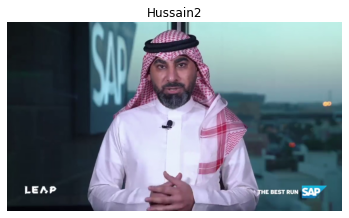

In [24]:
#Verify the image at the position of the mean_value as per the extracted frame

column_name = 'frame'
row_index = 1

# Call the function to display the image
display_image_from_column(sentimentResults, column_name, row_index)

#### To verify that all frames have been extracted and is clear the following funtion will retreive and show all the frames captured and saved to the processedData data frame

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_grid(sentimentResults, column):
    """
    Display a grid of images from a specified column in a DataFrame.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the image column.
        column_name (str): Name of the column containing the images.

    """
    for df in sentimentResults:
        # Get the number of images
        num_images = len(df[column])

        # Calculate the number of rows and columns for the grid
        num_rows = int(np.sqrt(num_images))
        num_cols = int(np.ceil(num_images / num_rows))

        # Create a figure and axes for the grid of images
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

        # Iterate through each image and display it in the corresponding grid cell
        for i, image in enumerate(df[column]):
            # Reshape the image to 2D if needed
            if len(image.shape) == 3:
                image = image[:, :, 0]  

            # Determine the current grid cell coordinates
            row = i // num_cols
            col = i % num_cols

            # Display the image in the corresponding grid cell
            ax = axes[row, col] if num_rows > 1 else axes[col]
            ax.imshow(image, cmap='gray')  # Adjust the cmap if needed
            ax.axis('off')
        
        plt.suptitle(df['video_name'].iloc[0])
        # Adjust the layout and padding of the grid
        plt.tight_layout()

        # Show the grid of images
        plt.show()

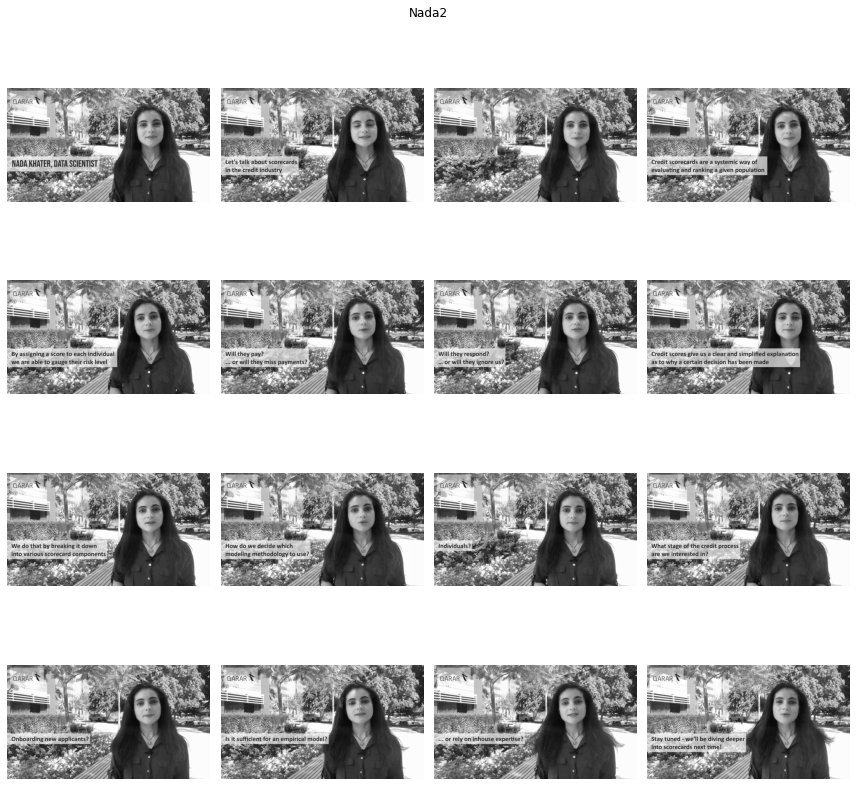

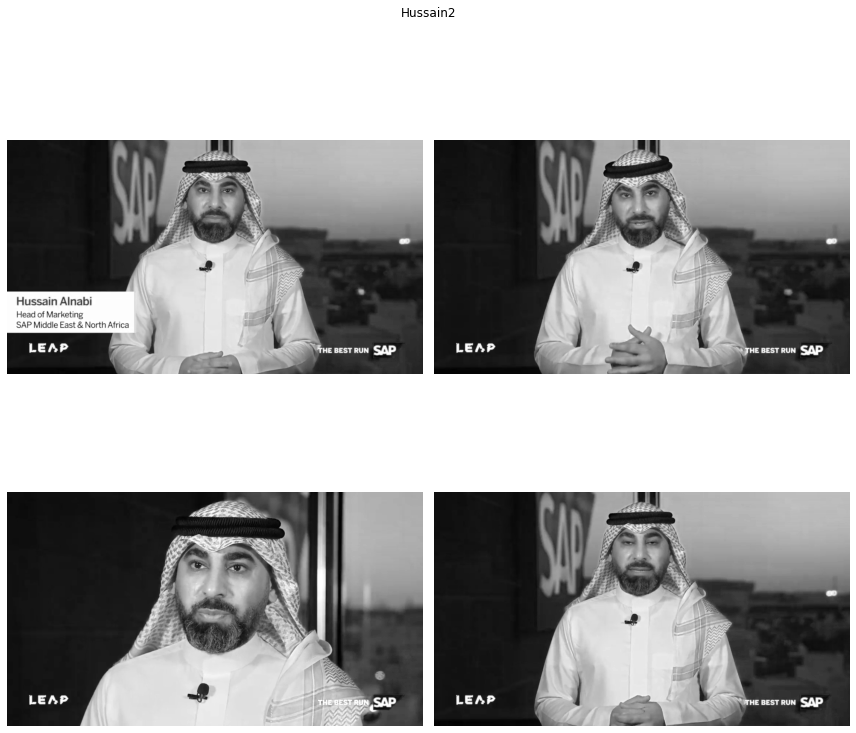

In [26]:
# Call the function to display the grid of images
display_image_grid(sentimentResults, 'frame')

### In order to apply my emotional model I need to extract the face of the person at a specific frame of the video. 

<span style="font-size: large;">The CascadeClassifier class is part of the OpenCV library and provides an implementation of the Haar cascades algorithm, which is a machine learning-based approach for object detection. The **Haar cascades algorithm** uses a set of trained classifiers to detect objects in images or video frames.</span>

In [31]:
def extract_faces_from_frames(sentimentResults):
    # Load the pre-trained face detection cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    
    # Iterate through each row in the DataFrame
    for df in sentimentResults:
        df['face'] = None
        for index, row in df.iterrows():
            # Retrieve the frame image from the DataFrame
            frame = row['frame']

            # Convert the frame image to grayscale
            gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

            # Perform face detection on the grayscale image
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(25, 25))
            #Only return the first face found.
            if len(faces) > 0:
                # Select the first detected face
                (x, y, w, h) = faces[len(faces)-1]

                # Extract the face region from the image
                face = frame[y:y+h, x:x+w]

                # Extract the face region from the frame image
                face = frame[y:y+h, x:x+w]
                df.at[index, 'face'] = face

#           # Displaying faces for review
#           cv2.imshow('Face', cv2.cvtColor(face, cv2.COLOR_RGB2BGR))
#           cv2.waitKey(0)

In [32]:
# Extract all the faces from the video based on the Frame data
extract_faces_from_frames(sentimentResults)

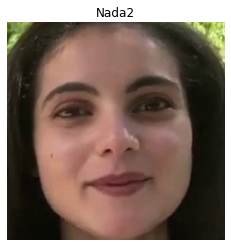

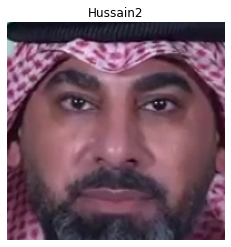

In [33]:
#show the face based on a certain row
column_name = 'face'
row_index = 0
# Call the function to display the image
display_image_from_column(sentimentResults, column_name, row_index)

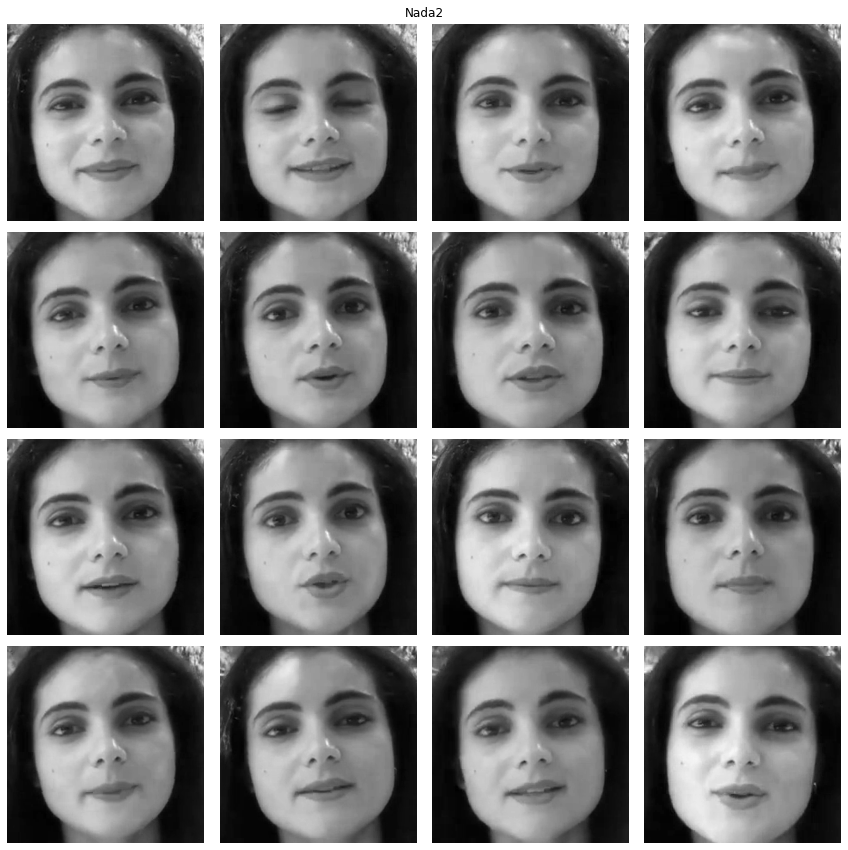

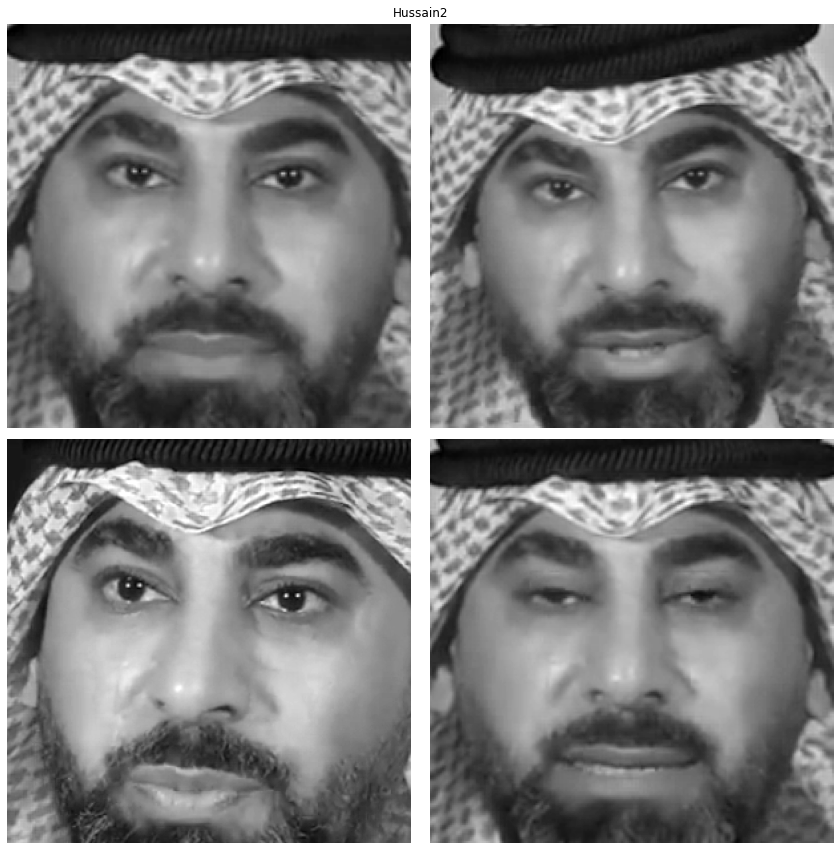

In [34]:
# Call the function to display the grid of images
display_image_grid(sentimentResults, 'face')

#### Get the emotion for the face and map this to a score


I have build a model to perform emotional recognition, and this will be part of the implpementation phase and fine tuning of the project. for now lets manually define the emotions. 

I will be using the 4th generation of my model: 
    
![Model](model.jpg)


In [35]:
import joblib
from PIL import Image
import numpy as np

# Load the saved model from the file
loaded_model = joblib.load('EmotionModel.pkl')

def add_emotions_based_on_model(image):
    # Convert the Pandas Series to a NumPy array
    img_array = np.array(image)

    # Preprocess the image (e.g., convert to grayscale and resize)
    img = Image.fromarray(img_array)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((48, 48))  # Resize to 48x48
    img_arr = np.array(img).reshape((1, 48, 48, 1))
    predictions = loaded_model.predict(img_arr)[0]
    # Highest confidence score in the predictions array.
    predicted_index = np.argmax(predictions)
    predicted_emotion = emotional_categories[predicted_index]
    predicted_weight = emotional_weights[predicted_emotion]
    
    return predicted_emotion, predictions, predicted_index, predicted_weight

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-09-24 03:03:32         8171
metadata.json                                  2023-09-24 03:03:32           64
variables.h5                                   2023-09-24 03:03:32      5156048
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_4
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........

In [36]:
sentimentemotionalResults = sentimentResults

# Iterate through each DataFrame in sentimentResults
for df in sentimentemotionalResults:
    # Apply the add_emotions_based_on_model function to each row in the 'face' column
    # and store the results in new columns
    df[['predicted_emotion', 'predicted_scores', 'predicted_index', 'predicted_weight']] = df['face'].apply(add_emotions_based_on_model).apply(pd.Series)


1/1 [==============================] - 0s 13ms/step


In [37]:
for df in sentimentemotionalResults:
    for index, row in df.iterrows():
        print(f"Predicted Emotion: {row['predicted_emotion']} : Predicted Scores: {row['predicted_scores']} : Predicted Index: {row['predicted_index']} : Predicted weigth: {row['predicted_weight']}")

Predicted Emotion: Happiness : Predicted Scores: [1.0741154e-02 1.8733037e-03 1.9952849e-02 7.5140250e-01 8.3471552e-02
 1.3195316e-01 6.0552667e-04] : Predicted Index: 3 : Predicted weigth: 3
Predicted Emotion: Happiness : Predicted Scores: [2.3763981e-03 2.1267132e-04 5.5211009e-03 8.8872331e-01 4.6594087e-02
 5.6424789e-02 1.4770377e-04] : Predicted Index: 3 : Predicted weigth: 3
Predicted Emotion: Happiness : Predicted Scores: [0.02604241 0.00268345 0.02362654 0.50976574 0.30752337 0.12799598
 0.00236249] : Predicted Index: 3 : Predicted weigth: 3
Predicted Emotion: Neutral : Predicted Scores: [0.02499782 0.00198616 0.04583109 0.25293824 0.34878957 0.32508808
 0.00036905] : Predicted Index: 4 : Predicted weigth: 0
Predicted Emotion: Sadness : Predicted Scores: [0.05988826 0.0111422  0.07723408 0.10397603 0.320374   0.42541406
 0.00197136] : Predicted Index: 5 : Predicted weigth: -2
Predicted Emotion: Neutral : Predicted Scores: [0.07572526 0.00219577 0.1318603  0.05315296 0.4263639

In [39]:
# Iterate through each DataFrame in sentimentResults
for df in sentimentemotionalResults:
    # Print only the 'predicted_emotion' column
    print(df['video_name'] + ":" + df['predicted_emotion'] + ":")
    print(df['predicted_weight'])

0
0     Nada2:Happiness:
1     Nada2:Happiness:
2     Nada2:Happiness:
3       Nada2:Neutral:
4       Nada2:Sadness:
5       Nada2:Neutral:
6       Nada2:Sadness:
7     Nada2:Happiness:
8       Nada2:Neutral:
9       Nada2:Neutral:
10      Nada2:Neutral:
11      Nada2:Neutral:
12      Nada2:Sadness:
13      Nada2:Sadness:
14    Nada2:Happiness:
15      Nada2:Neutral:
dtype: object
0     3
1     3
2     3
3     0
4    -2
5     0
6    -2
7     3
8     0
9     0
10    0
11    0
12   -2
13   -2
14    3
15    0
Name: predicted_weight, dtype: int64
0    Hussain2:Neutral:
1      Hussain2:Angry:
2    Hussain2:Neutral:
3    Hussain2:Neutral:
dtype: object
0    0
1   -3
2    0
3    0
Name: predicted_weight, dtype: int64


In [40]:
# Doing this to confirm all the data elements that is required is there
# Loop through each DataFrame in sentimentResults2
for idx, df in enumerate(sentimentemotionalResults):
    # Print the column names for each DataFrame
    print(f"DataFrame {idx} column names:")
    print(df.columns)
    print("\n")

DataFrame 0 column names:
Index(['id', 'seek', 'start', 'end', 'text', 'tokens', 'temperature',
       'avg_logprob', 'compression_ratio', 'no_speech_prob', 'video_name',
       'sentiment_score', 'sentiment', 'sentiment_weights', 'mean_value',
       'frame_location', 'frame', 'face', 'predicted_emotion',
       'predicted_scores', 'predicted_index', 'predicted_weight'],
      dtype='object')


DataFrame 1 column names:
Index(['id', 'seek', 'start', 'end', 'text', 'tokens', 'temperature',
       'avg_logprob', 'compression_ratio', 'no_speech_prob', 'video_name',
       'sentiment_score', 'sentiment', 'sentiment_weights', 'mean_value',
       'frame_location', 'frame', 'face', 'predicted_emotion',
       'predicted_scores', 'predicted_index', 'predicted_weight'],
      dtype='object')




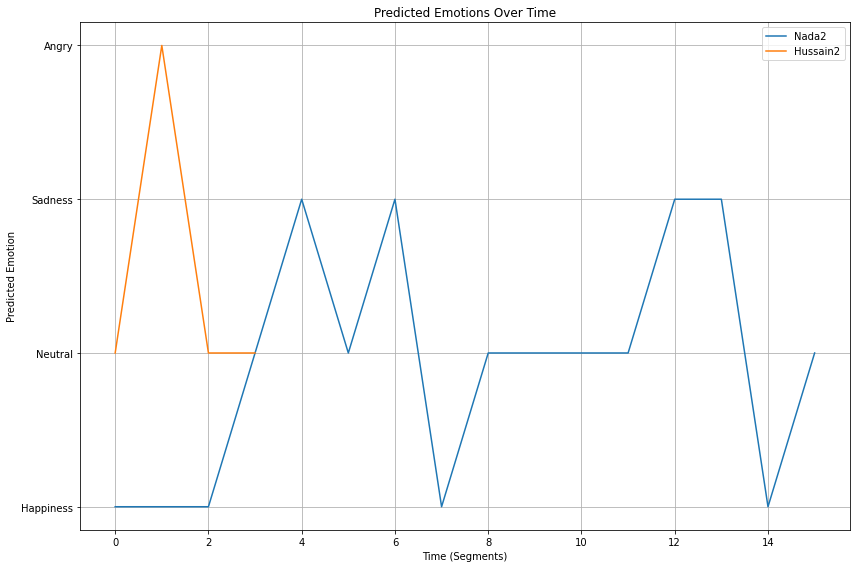

In [41]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(12, 8))

# Iterate through each DataFrame in sentimentResults
for df in sentimentemotionalResults:
    # Extract the video name and predicted emotions
    video_name = df['video_name'].iloc[0]
    predicted_emotions = df['predicted_emotion']
    
    # Generate x values (time) based on the number of segments
    time_points = range(len(predicted_emotions))
    
    # Plot the predicted emotions over time
    plt.plot(time_points, predicted_emotions, label=video_name)

# Add labels and legend
plt.xlabel('Time (Segments)')
plt.ylabel('Predicted Emotion')
plt.title('Predicted Emotions Over Time')
plt.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


### 5. Normalizing the Scores

In [43]:
# For the sentiment analysis model the min and max values for the score is -1 to 1. 
# For the emotional analysis model the min and max values for the score is -3 to 3. 
# scaled_x = 2 * (x - min_val) / (max_val - min_val) - 1 - this is to scale the variables.
for df in sentimentemotionalResults:
    # Print only the 'predicted_emotion' column
    print('Sentiment Score')
    print( 2 * (df['sentiment_score'] - (-1)) / (1 - (-1)) - 1)
    print('Emotional Score')
    print(2 * ((df['predicted_weight']) - (-3)) / ((3) - (-3)) - 1)

Sentiment Score
0     0.0000
1     0.3818
2     0.0000
3     0.7003
4    -0.5859
5    -0.2500
6    -0.3612
7     0.7430
8     0.0000
9     0.0000
10    0.3818
11    0.6486
12    0.0000
13    0.0000
14    0.0000
15    0.0772
Name: sentiment_score, dtype: float64
Emotional Score
0     1.000000
1     1.000000
2     1.000000
3     0.000000
4    -0.666667
5     0.000000
6    -0.666667
7     1.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12   -0.666667
13   -0.666667
14    1.000000
15    0.000000
Name: predicted_weight, dtype: float64
Sentiment Score
0    0.8834
1    0.0000
2    0.0000
3    0.3182
Name: sentiment_score, dtype: float64
Emotional Score
0    0.0
1   -1.0
2    0.0
3    0.0
Name: predicted_weight, dtype: float64


In [55]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Iterate through each DataFrame in sentimentemotionalResults
for df in sentimentemotionalResults:
    # Normalize the sentiment score base on min and max values
    df['normalized_sentiment_score'] = 2 * (df['sentiment_score'] - (-1)) / (1 - (-1)) - 1
    df['normalized_emotional_score'] = 2 * (df['predicted_weight'] - (-3)) / (3 - (-3)) - 1

# Print the normalized sentiment scores and emotional scores for each DataFrame
for i, df in enumerate(sentimentemotionalResults):
    print("----------------------------------------------------------------------")
    print(f"Normalized Sentiment and Emotional Scores for DataFrame {i + 1}:")
    print("----------------------------------------------------------------------")
    # Print combined scores
    print("Combined Scores:")
    for index, row in df.iterrows():
        sentiment_score = row['normalized_sentiment_score']
        emotional_score = row['normalized_emotional_score']
        print(f"Sentiment: {sentiment_score}, Emotional: {emotional_score}")


----------------------------------------------------------------------
Normalized Sentiment and Emotional Scores for DataFrame 1:
----------------------------------------------------------------------
Combined Scores:
Sentiment: 0.0, Emotional: 1.0
Sentiment: 0.3817999999999999, Emotional: 1.0
Sentiment: 0.0, Emotional: 1.0
Sentiment: 0.7002999999999999, Emotional: 0.0
Sentiment: -0.5859, Emotional: -0.6666666666666667
Sentiment: -0.25, Emotional: 0.0
Sentiment: -0.36119999999999997, Emotional: -0.6666666666666667
Sentiment: 0.7429999999999999, Emotional: 1.0
Sentiment: 0.0, Emotional: 0.0
Sentiment: 0.0, Emotional: 0.0
Sentiment: 0.3817999999999999, Emotional: 0.0
Sentiment: 0.6486000000000001, Emotional: 0.0
Sentiment: 0.0, Emotional: -0.6666666666666667
Sentiment: 0.0, Emotional: -0.6666666666666667
Sentiment: 0.0, Emotional: 1.0
Sentiment: 0.07719999999999994, Emotional: 0.0
----------------------------------------------------------------------
Normalized Sentiment and Emotional Sc

### 6. Combining Scores into a Composite Index

In [57]:
# Define weights for sentiment and emotional scores
sentiment_weight = 0.5  # Adjust this value to give more weight to sentiment or emotional score as needed
emotional_weight = 0.5  # Adjust this value accordingly

# Create a list to store composite scores for each DataFrame
composite_scores_list = []

# Iterate through each DataFrame in sentimentemotionalResults
for df in sentimentemotionalResults:
    # Calculate the composite score
    df['composite_score'] = sentiment_weight * df['normalized_sentiment_score'] + emotional_weight * df['normalized_emotional_score']
    
    # Append the composite score to the list
    composite_scores_list.append(df['composite_score'])

# Print the composite scores for each DataFrame
for i, df in enumerate(sentimentemotionalResults):
    print("----------------------------------------------------------------------")
    print(f"Composite Scores for DataFrame {i + 1}:")
    print("----------------------------------------------------------------------")
    for composite_score in df['composite_score']:
        print(f"Composite Score: {composite_score}")


----------------------------------------------------------------------
Composite Scores for DataFrame 1:
----------------------------------------------------------------------
Composite Score: 0.5
Composite Score: 0.6909
Composite Score: 0.5
Composite Score: 0.35014999999999996
Composite Score: -0.6262833333333333
Composite Score: -0.125
Composite Score: -0.5139333333333334
Composite Score: 0.8714999999999999
Composite Score: 0.0
Composite Score: 0.0
Composite Score: 0.19089999999999996
Composite Score: 0.32430000000000003
Composite Score: -0.33333333333333337
Composite Score: -0.33333333333333337
Composite Score: 0.5
Composite Score: 0.03859999999999997
----------------------------------------------------------------------
Composite Scores for DataFrame 2:
----------------------------------------------------------------------
Composite Score: 0.4417
Composite Score: -0.5
Composite Score: 0.0
Composite Score: 0.15910000000000002


In [60]:
# Calculate the overall scores for each DataFrame
overall_scores_list = []

for df in sentimentemotionalResults:
    overall_score = df['composite_score'].mean()  # Calculate the average composite score
    overall_scores_list.append(overall_score)

# Print the overall scores for each DataFrame
for i, overall_score in enumerate(overall_scores_list):
    print(f"Overall Score for Video {i + 1}: {overall_score}")

Overall Score for Video 1: 0.12715416666666665
Overall Score for Video 2: 0.0252


In [32]:
weighted_emotional_scores = [emotional_weights[emotion] * score for emotion, score in zip(emotional_states, normalized_sentiment_scores)]
weighted_sentiment_scores = [sentiment_weights[sentiment] * score for sentiment, score in zip(sentiment_categories, sentiment_scores)]

composite_index_score = sum(weighted_emotional_scores + weighted_sentiment_scores)


### 7. Validation of the Index Score

This involves testing the reliability and validity of the index score to ensure that it accurately reflects the emotional and sentiment responses of individuals. Validation can be done through statistical analysis, sensitivity testing, or expert review

In [33]:
print(composite_index_score)

[0.34680412]


In [46]:
# Define the maximum normalized scores
max_normalized_emotion_score = 1.0
max_normalized_sentiment_score = 1.0
# Define the minimum normalized scores
min_normalized_emotion_score = 0.0
min_normalized_sentiment_score = 0.0

# Calculate the max and min index score
max_index_score = (max_normalized_emotion_score * emotional_weights['Happiness']) + (max_normalized_sentiment_score * sentiment_weights['Positive'])
min_index_score = (min_normalized_emotion_score * emotional_weights['Anger']) + (min_normalized_sentiment_score * sentiment_weights['Negative'])

# Print the maximum index score
print("Maximum Index Score:", max_index_score)
print("Minimum Index Score:", min_index_score)


Maximum Index Score: 4.0
Minimum Index Score: -0.0


### trying model bit to call my model externally.

In [494]:
pip install modelbit

  Obtaining dependency information for modelbit from https://files.pythonhosted.org/packages/94/6d/fa5db2a6905659133c0973b6d03b62f4fb3e103a19339cc513d8103db4fc/modelbit-0.28.9-py3-none-any.whl.metadata
  Obtaining dependency information for pycryptodomex from https://files.pythonhosted.org/packages/3c/a4/81675804055339db8e277f48bf0012b554a2322f15d000caebf7c8d3f011/pycryptodomex-3.19.0-cp35-abi3-win_amd64.whl.metadata
  Obtaining dependency information for types-requests from https://files.pythonhosted.org/packages/59/61/31ce2823d0b50c9067dd8ac8606df6a68b05f06adcf60ed85c4d122a3626/types_requests-2.31.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for types-PyYAML from https://files.pythonhosted.org/packages/da/14/7ee3c82b073aa56ba51a7c61e1c37045171fde3d7e60a6e2b1763bdb455c/types_PyYAML-6.0.12.11-py3-none-any.whl.metadata
     -------------------------------------- 511.3/511.3 kB 3.2 MB/s eta 0:00:00
  Obtaining dependency information for types-urllib3 from https://file

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\pkginfo.exe' -> 'C:\\Python310\\Scripts\\pkginfo.exe.deleteme'



In [496]:
import modelbit
mb = modelbit.login()

In [ ]:
# add the model to the registry
mb.add_model("EmotionModel", lm)

Warning, skipping module '/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg': [Errno 20] Not a directory: '/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg'
Warning, skipping module '/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg': [Errno 20] Not a directory: '/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg'
Warning, skipping module '/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg': [Errno 20] Not a directory: '/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg'
